In [2]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import time
from math import pi
import matplotlib.pyplot as plt

Following the order of [Spatiotemporal Tiling of the Kuramoto-Sivashinsky Equation](#thesis), the next process that was developed after the ability to find periodic orbits was to clip out smaller domains and use them to find "fundamental periodic orbits". These are the smallest periodic orbits which serve as building blocks for all other solutions.


In [3]:
figs = '../data/local/thesis/figures/'

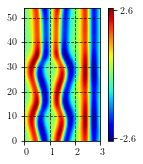

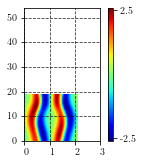

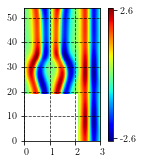

In [4]:
# small vanity rotation
orbit_ = read_h5('OrbitKS_T54p129_L26p744.h5', directory='../data/examples/').rotate(0.1, axis=1).rotate(2, axis=0).reshape(512,512)
orbit_.plot(filename='gap_initial.pdf', directory=figs)
mask_orbit(orbit_, ((0, 19),(0, 2.1)), mask_region='exterior').plot(filename='gap_interior.pdf', directory=figs,padding=False)
mask_orbit(orbit_, ((0, 19),(0, 2.1)), mask_region='interior').plot(filename='gap_exterior.pdf', directory=figs,padding=False)

The structure defined approximately on $t \in [0, 35], \forall x$ looks to repeat twice. Therefore this is the target of the clipping. Again, I want to stress that this iterative manner of clipping is unnecessary, but it was how this calculation was originally performed. Orbithunter's utility again shines here via the function 'clip'. By calling the clip function the subdomain is taken from the original orbit. The clipping automatically calculates the corresponding field, discretization, parameters. This is designed to work for $d+1$ dimensional spacetime with vector equations, but of course would need testing.


-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 5.55580723754711
Target residual tolerance : 3.2e-07
Maximum iteration number : 250
Initial guess : OrbitKS({"basis": "modes", "parameters": ["35.0994", "26.7442", "0"], "field_shape": ["16", "20"]})
-------------------------------------------------------------------------------------------------
#####
Converged. Exiting with residual 9.22232009242983e-11


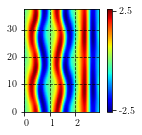

In [5]:
first_clipping = clip(orbit_.reshape(512,512), ((0., 35), (None, None))).reshape(16, 20)
first_orbit = converge(first_clipping,  method='lstsq', verbose=True, ftol=0).orbit
first_orbit.plot(filename='gap_clip1.pdf', directory=figs)


-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 0.036501858970037875
Target residual tolerance : 3.2e-07
Maximum iteration number : 250
Initial guess : OrbitKS({"basis": "modes", "parameters": ["19.9988", "26.2807", "0"], "field_shape": ["16", "20"]})
-------------------------------------------------------------------------------------------------
##
Converged. Exiting with residual 2.3631962251875997e-12


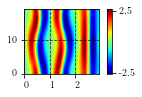

In [6]:
second_clipping = clip(first_orbit.reshape(512,512), ((0., 20), (None, None))).reshape(16, 20)
second_orbit = converge(second_clipping, method='lstsq', verbose=True, ftol=0).orbit
second_orbit.plot(filename='gap_clip2.pdf', directory=figs)


-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 410.98527788424445
Target residual tolerance : 3.2e-07
Maximum iteration number : 250
Initial guess : OrbitKS({"basis": "modes", "parameters": ["19.1918", "18.5856", "0"], "field_shape": ["16", "20"]})
-------------------------------------------------------------------------------------------------
####
Converged. Exiting with residual 1.3645573656602014e-09


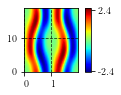

In [7]:
third_clipping = clip(second_orbit.reshape(512,512), ((None, None), (0, 2.1))).reshape(16, 20)
third_orbit = converge(third_clipping, method='lstsq', verbose=True, ftol=0).orbit
third_orbit.plot(filename='gap.pdf', directory=figs)

For this demonstration, I will use the very first orbit and clipping method I ever applied, which was an iterative procedure to find (converge) a sequence of progressively smaller orbits.

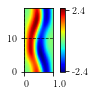

9.733567856432908e-10


(None, None)

In [8]:
antisymmetric_clipping = convert_class(third_orbit, AntisymmetricOrbitKS)
third_orbit = converge(antisymmetric_clipping, method='lstsq', verbose=True, ftol=0).orbit
third_orbit.plot(filename='gap_antisymmetric.pdf', directory=figs), print(third_orbit.residual())

Going by the residual the clipping does indeed exist in the antisymmetric subspace!

In [9]:
?kse_integrate

In [10]:
int1 = kse_integrate(OrbitKS(seed=0, parameters=(512, 512), M=1024), verbose=True,
                     integration_time=1000, step_size=0.25, return_trajectory=False)

Integration progress [#########################]

In [11]:
int2 = kse_integrate(int1, verbose=True, integration_time=512, starting_point=0, step_size=0.25)

Integration progress [##########################]

In [12]:
figs

'../data/local/thesis/figures/'

Uncomment the next cell to save the plot as a pdf (can change extension to any extension accepted by matplotlib).
Else, just plot the field without saving.

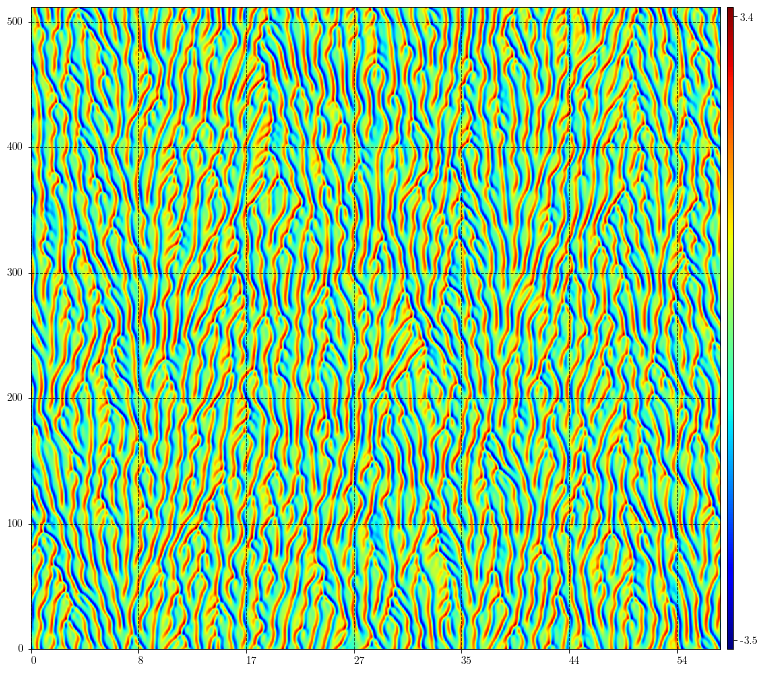

In [13]:
# int2.plot(filename='clipping_trajectory.pdf', directory=figs)
int2.plot()

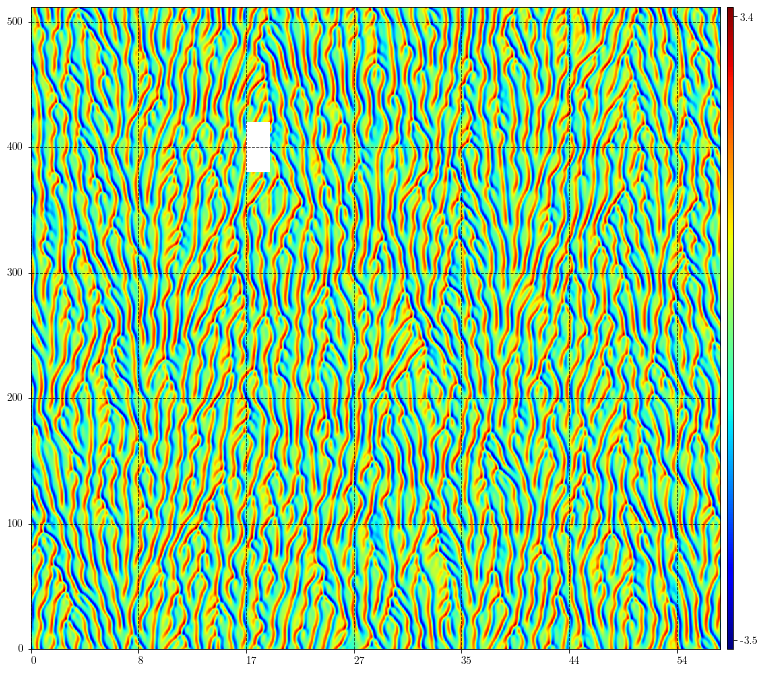

In [14]:
masked_field = mask_orbit(int2, ((380, 420), (18, 20)), mask_region='interior')
masked_field.plot()

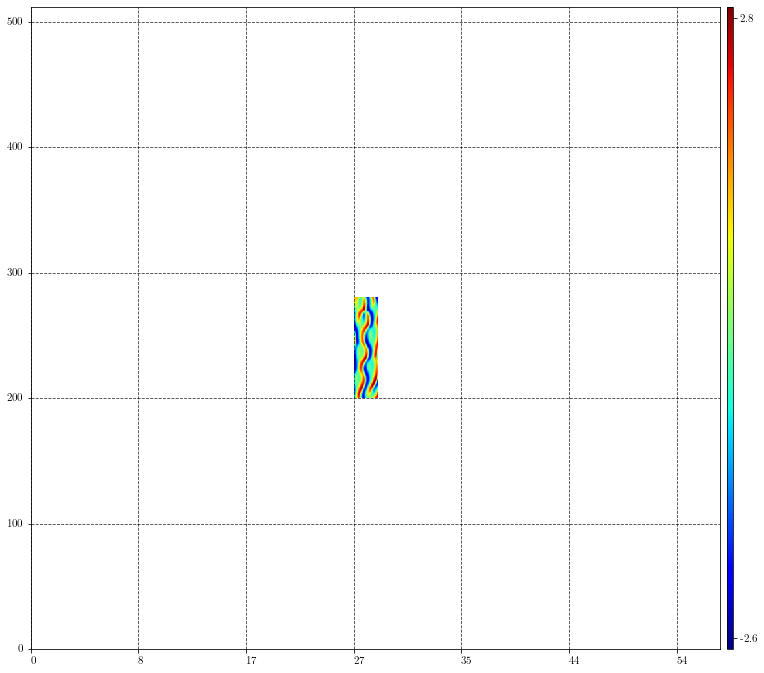

In [46]:
masked_field = mask_orbit(int2,  ((200, 280), (27, 29)), mask_region='exterior')
masked_field.plot(filename='clipping_trajectory_interior.pdf', directory=figs)

In [29]:
clipping = clip(int2,   ((200, 280), (27, 29)), clipping_class=RelativeOrbitKS).reshape(32, 42)

In [1]:
clipping

NameError: name 'clipping' is not defined

In [57]:
18/(2*pi*np.sqrt(2))

2.025711711353489

In [62]:
clipping_result.orbit

RelativeOrbitKS({"basis": "modes", "parameters": ["113.2803", "18.6811", "2.9328"], "field_shape": ["32", "42"]})

In [61]:
clipping_result.orbit.L/(2*pi*(np.sqrt(2)))

2.1023636126165233

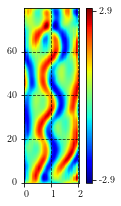

In [51]:
clipping.plot(filename='clipping_original.pdf', directory=figs, fundamental_domain=False)

In [35]:
clipping_result = converge(clipping, method='hybrid', verbose=True, preconditioning=True, pexp=(1,4))


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 1757185.3698848714
Target residual tolerance : 1.3440000000000002e-06
Maximum iteration number : 21504
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["80.0", "18.0", "14.7083"], "field_shape": ["32", "42"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=9.5182033 after 5000 gradient descent steps. Parameters:(80.00770350112731, 18.021934234009635, 12.915913350689129)
#################################################
 Residual=5.9754289 after 10000 gradient descent steps. Parameters:(80.01246329012207, 18.02201949615407, 11.813529761670063)
#################################################
 Residual=4.2969354 after 15000 gradient descent steps. Parameters:(80.01628020654728, 18.02207533286132, 10.902899163476484)
####

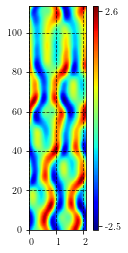

In [52]:
clipping_result.orbit.plot(filename='clipping_result.pdf', directory=figs)

In [56]:
clipping_result.orbit

RelativeOrbitKS({"basis": "modes", "parameters": ["113.2803", "18.6811", "2.9328"], "field_shape": ["32", "42"]})


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 6093.104546302806
Target residual tolerance : 3.8400000000000005e-07
Maximum iteration number : 6144
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["16", "24"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=6.6753493 after 5000 gradient descent steps. Parameters:(40.049160981640846, 18.469076285841204, 13.344220020904546)
###########
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 6.131935483075967
Target residual tolerance : 3.8400000000000005e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.059", "18.4909", "13.3272"], "

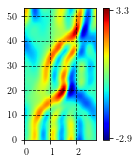


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 12588.41023898096
Target residual tolerance : 4.16e-07
Maximum iteration number : 6656
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["16", "26"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=9.3927825 after 5000 gradient descent steps. Parameters:(40.02857280723884, 18.455607766443215, 13.380970581430415)
################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 8.459742574283512
Target residual tolerance : 4.16e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.037", "18.4762", "13.3657"], "field_shape": ["16", "26

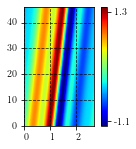


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 24828.35594327599
Target residual tolerance : 4.4800000000000004e-07
Maximum iteration number : 7168
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["16", "28"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=13.2894566 after 5000 gradient descent steps. Parameters:(40.01627054167535, 18.4515554534041, 13.403656551329465)
#####################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 11.429284065613707
Target residual tolerance : 4.4800000000000004e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0227", "18.4727", "13

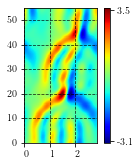


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 47090.48558054486
Target residual tolerance : 4.800000000000001e-07
Maximum iteration number : 7680
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["16", "30"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=19.8201915 after 5000 gradient descent steps. Parameters:(40.00906434925735, 18.544471175047228, 13.417341846183856)
##########################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 16.160829777290726
Target residual tolerance : 4.800000000000001e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0136", "18.5708"

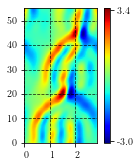


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 86413.28427783202
Target residual tolerance : 5.12e-07
Maximum iteration number : 8192
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["16", "32"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=21.1544469 after 5000 gradient descent steps. Parameters:(40.00965321438369, 18.663366089571404, 13.416385976893116)
###############################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 16.787159918928882
Target residual tolerance : 5.12e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0154", "18.6933", "13.4058"], "field_

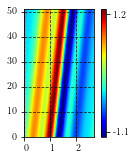


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 154209.42595364415
Target residual tolerance : 5.44e-07
Maximum iteration number : 8704
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["16", "34"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=31.3829844 after 5000 gradient descent steps. Parameters:(40.005265951886074, 18.535411435564487, 13.424502428969586)
#####################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 23.936105993358332
Target residual tolerance : 5.44e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.009", "18.5727", "13.4175"], 

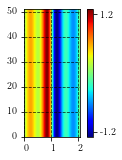


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 268796.25463710027
Target residual tolerance : 5.760000000000001e-07
Maximum iteration number : 9216
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["16", "36"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 268796.25463710027
Target residual tolerance : 5.760000000000001e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["16", "36"]})
-------------------------------------------------------------------------------------------------
########################
Tolerance threshold met. Exiting with res

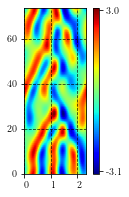


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 284835.4693795721
Target residual tolerance : 6.08e-07
Maximum iteration number : 9728
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["16", "38"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 284835.4693795721
Target residual tolerance : 6.08e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["16", "38"]})
-------------------------------------------------------------------------------------------------
######################### Residual=0.8423928 after 25 lstsq iterations
##
Insufficient residua

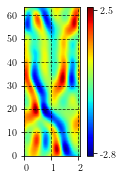


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 300163.8366188198
Target residual tolerance : 6.4e-07
Maximum iteration number : 10240
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["16", "40"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 300163.8366188198
Target residual tolerance : 6.4e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["16", "40"]})
-------------------------------------------------------------------------------------------------
######################### Residual=3.0425976 after 25 lstsq iterations
########################

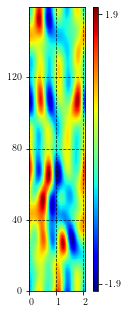


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 6856.095030852937
Target residual tolerance : 4.32e-07
Maximum iteration number : 6912
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["18", "24"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=7.7673893 after 5000 gradient descent steps. Parameters:(40.05876142535043, 18.53440623459381, 13.331338088409774)
###################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 6.78957698079355
Target residual tolerance : 4.32e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0778", "18.5763", "13.2995"], "field_shape": ["18", "

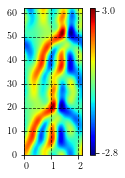


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 14166.814099571113
Target residual tolerance : 4.68e-07
Maximum iteration number : 7488
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["18", "26"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=10.8987382 after 5000 gradient descent steps. Parameters:(40.03435405351908, 18.514570480507675, 13.373085219341371)
########################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 9.402366593984489
Target residual tolerance : 4.68e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0493", "18.5507", "13.3474"], "field_shape":

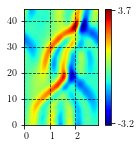


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 27943.352499574212
Target residual tolerance : 5.040000000000001e-07
Maximum iteration number : 8064
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["18", "28"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=15.3642458 after 5000 gradient descent steps. Parameters:(40.01961767408852, 18.50691649491422, 13.398943600854462)
##############################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 12.663444098898113
Target residual tolerance : 5.040000000000001e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0304", "18.5

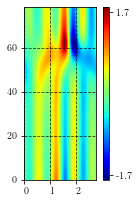


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 53000.97039972191
Target residual tolerance : 5.4e-07
Maximum iteration number : 8640
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["18", "30"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=22.7446216 after 5000 gradient descent steps. Parameters:(40.01094808180118, 18.608371955161918, 13.41465961635395)
####################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 17.64113890070504
Target residual tolerance : 5.4e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0183", "18.6456", "13.4015"], "field

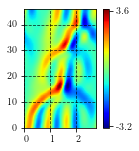


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 97261.51057057541
Target residual tolerance : 5.760000000000001e-07
Maximum iteration number : 9216
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["18", "32"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=24.2651047 after 5000 gradient descent steps. Parameters:(40.011662060496036, 18.729367616664845, 13.413554932131063)
##########################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 18.333679290970338
Target residual tolerance : 5.760000000000001e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40

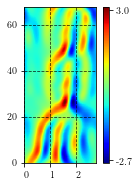


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 173571.10722953046
Target residual tolerance : 6.12e-07
Maximum iteration number : 9792
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["18", "34"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=35.7517642 after 5000 gradient descent steps. Parameters:(40.006366873986636, 18.597523944542793, 13.422915130274284)
###############################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 25.98995987131311
Target residual tolerance : 6.12e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0122", "18.6479", "1

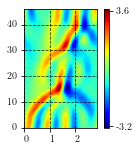


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 302547.04340561206
Target residual tolerance : 6.480000000000001e-07
Maximum iteration number : 10368
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["18", "36"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 302547.04340561206
Target residual tolerance : 6.480000000000001e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["18", "36"]})
-------------------------------------------------------------------------------------------------
######################### Residual=1.5041877 after 25 lstsq itera

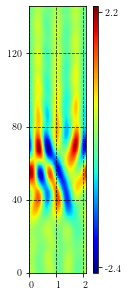


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 320592.4030759851
Target residual tolerance : 6.84e-07
Maximum iteration number : 10944
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["18", "38"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 320592.4030759851
Target residual tolerance : 6.84e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["18", "38"]})
-------------------------------------------------------------------------------------------------
######################### Residual=1.0122555 after 25 lstsq iterations
######################

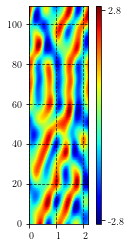


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 337844.02475025685
Target residual tolerance : 7.200000000000001e-07
Maximum iteration number : 11520
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["18", "40"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 337844.02475025685
Target residual tolerance : 7.200000000000001e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["18", "40"]})
-------------------------------------------------------------------------------------------------
######################### Residual=0.0005264 after 25 lstsq itera

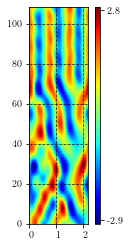


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 7626.891768380602
Target residual tolerance : 4.800000000000001e-07
Maximum iteration number : 7680
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["20", "24"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=8.7662022 after 5000 gradient descent steps. Parameters:(40.0674087977288, 18.58625132700442, 13.319829620586312)
##########################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 7.313747263474883
Target residual tolerance : 4.800000000000001e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0973", "18.647", "13

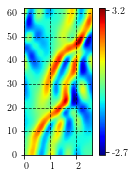


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 15759.795852486594
Target residual tolerance : 5.2e-07
Maximum iteration number : 8320
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["20", "26"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=12.2908936 after 5000 gradient descent steps. Parameters:(40.03954749972435, 18.566949224939098, 13.366178798708814)
#################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 10.187710121941924
Target residual tolerance : 5.2e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0621", "18.6162", "13.3286"], "field

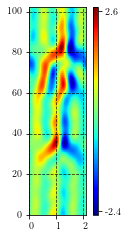


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 31085.448710981083
Target residual tolerance : 5.6e-07
Maximum iteration number : 8960
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["20", "28"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=17.3001511 after 5000 gradient descent steps. Parameters:(40.02261976907585, 18.559917279303864, 13.394946769186287)
#######################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 13.738332237428022
Target residual tolerance : 5.6e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0386", "18.6038", "13.3679"], 

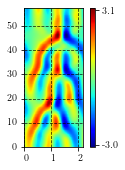


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 58959.809600664456
Target residual tolerance : 6.000000000000001e-07
Maximum iteration number : 9600
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["20", "30"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=18.9112061 after 5000 gradient descent steps. Parameters:(40.02415649826791, 19.10337964674634, 13.394024098236272)
#############################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 14.34460912189783
Target residual tolerance : 6.000000000000001e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["4

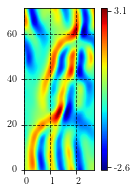


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 108195.25037933548
Target residual tolerance : 6.4e-07
Maximum iteration number : 10240
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["20", "32"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=27.1598507 after 5000 gradient descent steps. Parameters:(40.013462608783634, 18.79406016777378, 13.41121330134739)
#################################################
 Residual=19.9137762 after 10000 gradient descent steps. Parameters:(40.02580059670637, 18.843928372007785, 13.390347602841425)
##
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 19.705686595912404
Target residual tolerance 

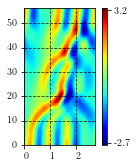


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 193081.10237131608
Target residual tolerance : 6.800000000000001e-07
Maximum iteration number : 10880
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["20", "34"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=39.8490236 after 5000 gradient descent steps. Parameters:(40.00736322407085, 18.659007681886692, 13.421597641470713)
#################################################
 Residual=28.8123217 after 10000 gradient descent steps. Parameters:(40.01431287284604, 18.715507204245416, 13.409568956260317)
########
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 27.746633214920095
Targe

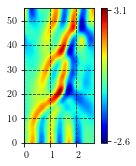


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 336551.377085668
Target residual tolerance : 7.200000000000001e-07
Maximum iteration number : 11520
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["20", "36"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 336551.377085668
Target residual tolerance : 7.200000000000001e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["20", "36"]})
-------------------------------------------------------------------------------------------------
######################### Residual=1.2859180 after 25 lstsq iteration

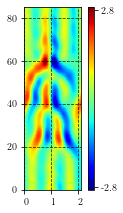


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 356623.9369115823
Target residual tolerance : 7.6e-07
Maximum iteration number : 12160
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["20", "38"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 356623.9369115823
Target residual tolerance : 7.6e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["20", "38"]})
-------------------------------------------------------------------------------------------------
######################### Residual=1.7606341 after 25 lstsq iterations
########################

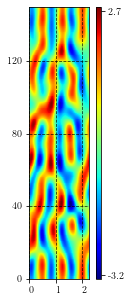


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 375811.09333657986
Target residual tolerance : 8.000000000000001e-07
Maximum iteration number : 12800
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["20", "40"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 375811.09333657986
Target residual tolerance : 8.000000000000001e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["20", "40"]})
-------------------------------------------------------------------------------------------------
######################### Residual=2.5207066 after 25 lstsq itera

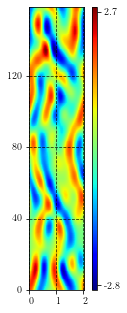


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 8403.975076302255
Target residual tolerance : 5.280000000000001e-07
Maximum iteration number : 8448
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["22", "24"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=9.7840683 after 5000 gradient descent steps. Parameters:(40.07575266817122, 18.63514497398558, 13.308181139995142)
##################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 7.7565693973332435
Target residual tolerance : 5.280000000000001e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.1177", "18

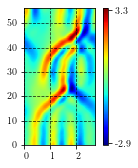


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 17363.38391700561
Target residual tolerance : 5.72e-07
Maximum iteration number : 9152
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["22", "26"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=13.8298125 after 5000 gradient descent steps. Parameters:(40.04473004653422, 18.61735858298279, 13.359031076258807)
#########################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 10.96439386515287
Target residual tolerance : 5.72e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.076", "18.6793", "13.3081"], 

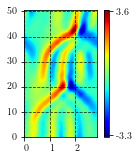


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 34245.96280860578
Target residual tolerance : 6.16e-07
Maximum iteration number : 9856
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["22", "28"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=19.6265345 after 5000 gradient descent steps. Parameters:(40.025660863549604, 18.77720809570669, 13.39135105882526)
################################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 14.909948730431752
Target residual tolerance : 6.16e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0475", "18.8227", "13

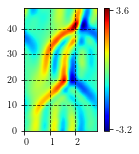


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 64951.41144578291
Target residual tolerance : 6.6e-07
Maximum iteration number : 10560
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["22", "30"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=21.3664978 after 5000 gradient descent steps. Parameters:(40.02742814295966, 19.15642482086011, 13.389730632576835)
#################################################
 Residual=15.9315205 after 10000 gradient descent steps. Parameters:(40.051396494937016, 19.188735380132975, 13.351608247981773)
#####
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 15.588661671577745
Target residual toleran

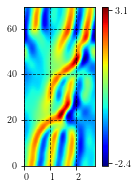


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 119186.42885974469
Target residual tolerance : 7.040000000000001e-07
Maximum iteration number : 11264
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["22", "32"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=30.5048450 after 5000 gradient descent steps. Parameters:(40.01530147260276, 18.85735499881483, 13.408748940775778)
#################################################
 Residual=22.5076212 after 10000 gradient descent steps. Parameters:(40.02928860885412, 18.910254056447183, 13.385719118195741)
############
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 21.368523288462402
Ta

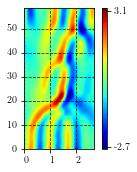


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 212690.90776483918
Target residual tolerance : 7.480000000000001e-07
Maximum iteration number : 11968
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["22", "34"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=44.5224337 after 5000 gradient descent steps. Parameters:(40.008368718099895, 18.719965040881167, 13.420222187049262)
#################################################
 Residual=32.3571421 after 10000 gradient descent steps. Parameters:(40.016266942087505, 18.78024607198714, 13.406934474073331)
###################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 29.914087028

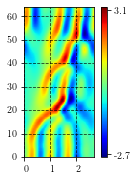


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 370727.0971445734
Target residual tolerance : 7.92e-07
Maximum iteration number : 12672
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["22", "36"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 370727.0971445734
Target residual tolerance : 7.92e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["22", "36"]})
-------------------------------------------------------------------------------------------------
######################### Residual=3.1026717 after 25 lstsq iterations
######################

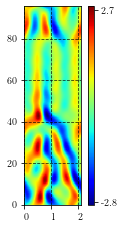


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 392841.71524490346
Target residual tolerance : 8.36e-07
Maximum iteration number : 13376
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["22", "38"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 392841.71524490346
Target residual tolerance : 8.36e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["22", "38"]})
-------------------------------------------------------------------------------------------------
######################### Residual=2.9371917 after 25 lstsq iterations
####################

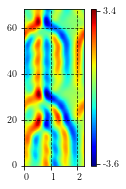


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 413980.06901216536
Target residual tolerance : 8.8e-07
Maximum iteration number : 14080
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["22", "40"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 413980.06901216536
Target residual tolerance : 8.8e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["22", "40"]})
-------------------------------------------------------------------------------------------------
######################
Tolerance threshold met. Exiting with residual 1.4002658935338458e-08


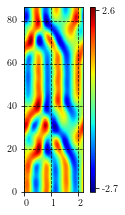


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 9180.669637349236
Target residual tolerance : 5.760000000000001e-07
Maximum iteration number : 9216
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["24", "24"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=10.7081776 after 5000 gradient descent steps. Parameters:(40.084279811844624, 18.682785056404917, 13.297368560829588)
##########################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 8.108089182791412
Target residual tolerance : 5.760000000000001e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.

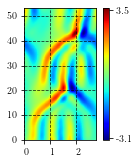


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 18966.276199478303
Target residual tolerance : 6.240000000000001e-07
Maximum iteration number : 9984
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["24", "26"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=15.2055429 after 5000 gradient descent steps. Parameters:(40.04994555273219, 18.66753805794528, 13.35251086448406)
#################################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 11.568963999541316
Target residual tolerance : 6.240000000000001e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters":

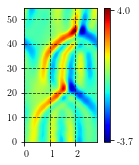


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 37405.635671862794
Target residual tolerance : 6.720000000000001e-07
Maximum iteration number : 10752
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["24", "28"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=21.6569230 after 5000 gradient descent steps. Parameters:(40.028739747704364, 18.841215283692524, 13.387643883282797)
#################################################
 Residual=16.3209426 after 10000 gradient descent steps. Parameters:(40.053708508569045, 18.888639544658012, 13.347871571925944)
#######
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 15.874978679295479
Targ

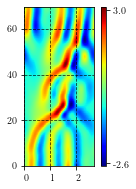


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 70941.6034944803
Target residual tolerance : 7.200000000000001e-07
Maximum iteration number : 11520
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["24", "30"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=23.5816799 after 5000 gradient descent steps. Parameters:(40.030737615302385, 19.21046149428078, 13.38584109974191)
#################################################
 Residual=17.5657388 after 10000 gradient descent steps. Parameters:(40.05742641069208, 19.24383871399397, 13.344465413085695)
###############
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 16.58831145305439
Tar

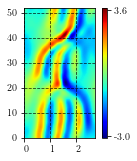


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 130175.48240406343
Target residual tolerance : 7.680000000000001e-07
Maximum iteration number : 12288
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["24", "32"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=33.5321501 after 5000 gradient descent steps. Parameters:(40.01717114519112, 18.920306527726492, 13.406531278060832)
#################################################
 Residual=24.8457148 after 10000 gradient descent steps. Parameters:(40.032807799851035, 18.976424272727414, 13.38153742358477)
######################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 22.7274138

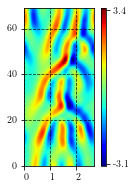


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 232297.6889057557
Target residual tolerance : 8.16e-07
Maximum iteration number : 13056
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["24", "34"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=48.7806033 after 5000 gradient descent steps. Parameters:(40.009398534230606, 18.78040747271074, 13.418991076543543)
#################################################
 Residual=35.5643618 after 10000 gradient descent steps. Parameters:(40.0182520122197, 18.8448758759397, 13.404564754484047)
##############################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 31.70357260065993
T

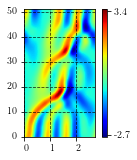


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 404898.50782658806
Target residual tolerance : 8.64e-07
Maximum iteration number : 13824
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["24", "36"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 404898.50782658806
Target residual tolerance : 8.64e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["24", "36"]})
-------------------------------------------------------------------------------------------------
#######################
Tolerance threshold met. Exiting with residual 8.233955782310737e-0

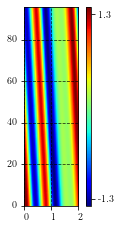


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 429055.76307116175
Target residual tolerance : 9.12e-07
Maximum iteration number : 14592
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["24", "38"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 429055.76307116175
Target residual tolerance : 9.12e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["24", "38"]})
-------------------------------------------------------------------------------------------------
######################### Residual=4.6965038 after 25 lstsq iterations
####################

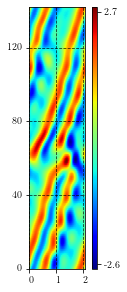


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 452146.73564537545
Target residual tolerance : 9.600000000000001e-07
Maximum iteration number : 15360
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["24", "40"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 452146.73564537545
Target residual tolerance : 9.600000000000001e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["24", "40"]})
-------------------------------------------------------------------------------------------------
######################### Residual=1.9544212 after 25 lstsq itera

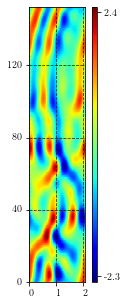


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 9956.146797118776
Target residual tolerance : 6.240000000000001e-07
Maximum iteration number : 9984
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["26", "24"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=11.6661708 after 5000 gradient descent steps. Parameters:(40.092863196662826, 18.727668952318073, 13.286772623396557)
#################################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 8.459951775330355
Target residual tolerance : 6.240000000000001e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters"

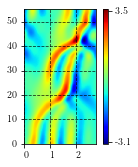


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 20567.869488843284
Target residual tolerance : 6.760000000000001e-07
Maximum iteration number : 10816
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["26", "26"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=16.6428641 after 5000 gradient descent steps. Parameters:(40.05523340613855, 18.713624848909852, 13.34611552222664)
#################################################
 Residual=12.5954904 after 10000 gradient descent steps. Parameters:(40.10043291930929, 18.789310380561474, 13.275441606653082)
########
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 12.162055209134284
Target

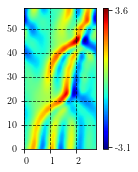


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 40563.42126616666
Target residual tolerance : 7.280000000000001e-07
Maximum iteration number : 11648
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["26", "28"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=23.7726993 after 5000 gradient descent steps. Parameters:(40.03184545764235, 18.90046952738436, 13.384016685272082)
#################################################
 Residual=17.8791249 after 10000 gradient descent steps. Parameters:(40.05939760643634, 18.948792143878233, 13.341230726251412)
################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 16.84817790402486


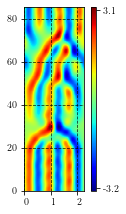


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 76929.67879788835
Target residual tolerance : 7.8e-07
Maximum iteration number : 12480
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["26", "30"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=25.8778194 after 5000 gradient descent steps. Parameters:(40.03406268811841, 19.260776520132072, 13.38203786412208)
#################################################
 Residual=19.2631482 after 10000 gradient descent steps. Parameters:(40.063522116017914, 19.29497048118622, 13.337489471310258)
########################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 17.587851956676793
Targe

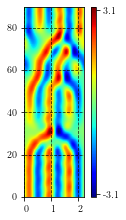


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 141162.28352941788
Target residual tolerance : 8.32e-07
Maximum iteration number : 13312
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["26", "32"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=36.6425416 after 5000 gradient descent steps. Parameters:(40.01903867805584, 18.979283024443625, 13.404358814417698)
#################################################
 Residual=27.2778950 after 10000 gradient descent steps. Parameters:(40.036353131535506, 19.03726574901498, 13.377447594573779)
#################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 24.126896834

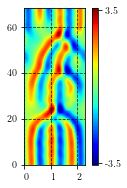


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 251902.12302670436
Target residual tolerance : 8.84e-07
Maximum iteration number : 14144
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["26", "34"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=53.1243891 after 5000 gradient descent steps. Parameters:(40.010420795176366, 18.83824152020931, 13.417781390824405)
#################################################
 Residual=38.8588064 after 10000 gradient descent steps. Parameters:(40.02023647066103, 18.905318344849885, 13.40224363690151)
#########################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 33.54

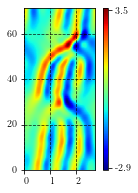


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 439067.6969953458
Target residual tolerance : 9.36e-07
Maximum iteration number : 14976
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["26", "36"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 439067.6969953458
Target residual tolerance : 9.36e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["26", "36"]})
-------------------------------------------------------------------------------------------------
######################### Residual=0.3128710 after 25 lstsq iterations
######################

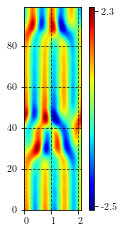


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 465265.32223462383
Target residual tolerance : 9.880000000000001e-07
Maximum iteration number : 15808
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["26", "38"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 465265.32223462383
Target residual tolerance : 9.880000000000001e-07
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["26", "38"]})
-------------------------------------------------------------------------------------------------
######################### Residual=3.3425104 after 25 lstsq itera

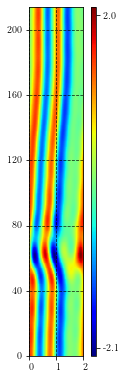


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 490308.47356955317
Target residual tolerance : 1.04e-06
Maximum iteration number : 16640
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["26", "40"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 490308.47356955317
Target residual tolerance : 1.04e-06
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["26", "40"]})
-------------------------------------------------------------------------------------------------
######################### Residual=7.6262375 after 25 lstsq iterations
####################

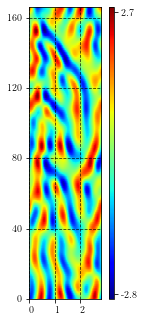


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 10729.113816604693
Target residual tolerance : 6.720000000000001e-07
Maximum iteration number : 10752
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["28", "24"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=12.6569432 after 5000 gradient descent steps. Parameters:(40.10170501763116, 18.77089807703575, 13.276019346510212)
#################################################
 Residual=9.1072230 after 10000 gradient descent steps. Parameters:(40.17851637547081, 18.88900413092545, 13.157816712773153)
#######
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 8.794822967695723
Target res

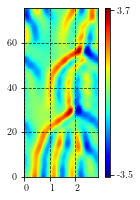


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 22165.31003940358
Target residual tolerance : 7.280000000000001e-07
Maximum iteration number : 11648
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["28", "26"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=18.1398708 after 5000 gradient descent steps. Parameters:(40.06072591913791, 18.759074878004093, 13.339626755388833)
#################################################
 Residual=13.6664201 after 10000 gradient descent steps. Parameters:(40.10999025200683, 18.835539016130213, 13.263921981405044)
################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 12.74206543558763

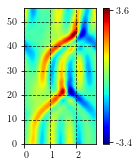


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 43714.23991556434
Target residual tolerance : 7.84e-07
Maximum iteration number : 12544
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["28", "28"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=25.9978054 after 5000 gradient descent steps. Parameters:(40.03507734344095, 18.959439201413442, 13.380337696333006)
#################################################
 Residual=19.5085262 after 10000 gradient descent steps. Parameters:(40.065303222616286, 19.008127112790604, 13.334502924892943)
#########################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 17.82953317792107
Ta

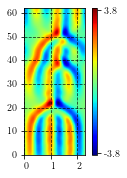


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 82905.60997180882
Target residual tolerance : 8.4e-07
Maximum iteration number : 13440
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["28", "30"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=28.2997398 after 5000 gradient descent steps. Parameters:(40.03752101164124, 19.31186561699402, 13.378175509185493)
#################################################
 Residual=21.0435409 after 10000 gradient descent steps. Parameters:(40.06984279481864, 19.34648937548594, 13.330418034517304)
##################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 18.599836059428

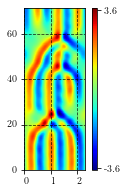


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 152128.2106214107
Target residual tolerance : 8.960000000000001e-07
Maximum iteration number : 14336
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["28", "32"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=39.9407564 after 5000 gradient descent steps. Parameters:(40.020987760823026, 19.03798135658913, 13.402142931191145)
#################################################
 Residual=29.8389465 after 10000 gradient descent steps. Parameters:(40.04004146590372, 19.097841341085385, 13.373298993443536)
###########################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial r

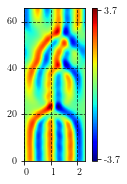


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 271470.9554832966
Target residual tolerance : 9.520000000000001e-07
Maximum iteration number : 15232
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["28", "34"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=57.7179145 after 5000 gradient descent steps. Parameters:(40.011491641135024, 18.895670965321575, 13.41653819816021)
#################################################
 Residual=42.3504619 after 10000 gradient descent steps. Parameters:(40.0223073814013, 18.96556568722216, 13.399877879917282)
#################################################
 Residual=35.7342380 after 15000 gradient descent steps. Parameters:(40.03262874124562, 19.005559890992753, 13.384128543352112)
##


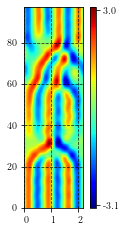


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 473176.50704327726
Target residual tolerance : 1.0080000000000001e-06
Maximum iteration number : 16128
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["28", "36"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 473176.50704327726
Target residual tolerance : 1.0080000000000001e-06
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["28", "36"]})
-------------------------------------------------------------------------------------------------
######################### Residual=0.3707231 after 25 lstsq ite

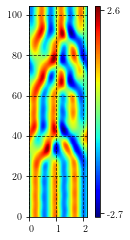


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 501408.0064092493
Target residual tolerance : 1.064e-06
Maximum iteration number : 17024
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["28", "38"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 501408.0064092493
Target residual tolerance : 1.064e-06
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["28", "38"]})
-------------------------------------------------------------------------------------------------
######################### Residual=2.6164050 after 25 lstsq iterations
####################

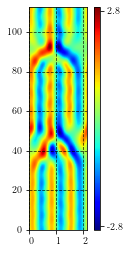


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 528397.317913313
Target residual tolerance : 1.12e-06
Maximum iteration number : 17920
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["28", "40"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 528397.317913313
Target residual tolerance : 1.12e-06
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["28", "40"]})
-------------------------------------------------------------------------------------------------
######################### Residual=0.0220805 after 25 lstsq iterations
########################

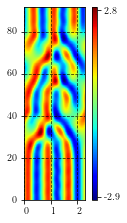


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 11501.710683962958
Target residual tolerance : 7.200000000000001e-07
Maximum iteration number : 11520
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["30", "24"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=13.6114311 after 5000 gradient descent steps. Parameters:(40.11059925812926, 18.81165047917419, 13.265436368401446)
#################################################
 Residual=9.7383987 after 10000 gradient descent steps. Parameters:(40.192990981994, 18.931164402467488, 13.139741599255917)
###############
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 9.088536620654116
Tar

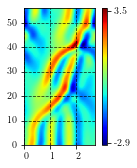


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 23761.397001549256
Target residual tolerance : 7.8e-07
Maximum iteration number : 12480
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["30", "26"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=19.6090128 after 5000 gradient descent steps. Parameters:(40.06637237148769, 18.802296957040216, 13.3331887805685)
#################################################
 Residual=14.6978986 after 10000 gradient descent steps. Parameters:(40.11960218250898, 18.879065800269636, 13.252590444701813)
########################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 13.24234968279441
Target

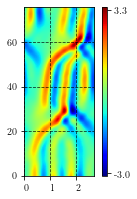


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 46862.21237422777
Target residual tolerance : 8.4e-07
Maximum iteration number : 13440
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["30", "28"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=28.2376057 after 5000 gradient descent steps. Parameters:(40.03847945720231, 19.016468520830905, 13.376666569236523)
#################################################
 Residual=21.1118934 after 10000 gradient descent steps. Parameters:(40.07137797388345, 19.064829313085202, 13.327839178086554)
##################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 18.7185310751

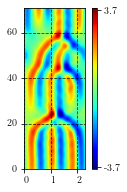


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 88875.77992799859
Target residual tolerance : 9.000000000000001e-07
Maximum iteration number : 14400
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["30", "30"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=30.7416760 after 5000 gradient descent steps. Parameters:(40.041165309215174, 19.36171273258924, 13.374319063577627)
#################################################
 Residual=22.7972116 after 10000 gradient descent steps. Parameters:(40.07634985174244, 19.396037466460577, 13.32340839995445)
###########################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial re

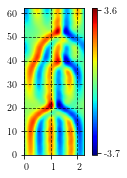


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 163083.16663114255
Target residual tolerance : 9.600000000000001e-07
Maximum iteration number : 15360
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["30", "32"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=43.3089797 after 5000 gradient descent steps. Parameters:(40.02307723393839, 19.095173302054715, 13.399924036413154)
#################################################
 Residual=32.4192983 after 10000 gradient descent steps. Parameters:(40.043925364343146, 19.156254983415923, 13.369159092199228)
#################################################
 Residual=27.2353244 after 15000 gradient descent steps. Parameters:(40.063259688279764, 19.184799861766365, 13.340747545916692

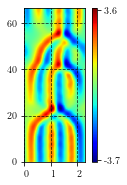


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 291019.82981189527
Target residual tolerance : 1.02e-06
Maximum iteration number : 16320
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["30", "34"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=62.4463413 after 5000 gradient descent steps. Parameters:(40.01265384397472, 18.952057713784043, 13.41529319214316)
#################################################
 Residual=45.9138450 after 10000 gradient descent steps. Parameters:(40.02452692288052, 19.024299167882486, 13.397509520156929)
#################################################
 Residual=38.8028454 after 15000 gradient descent steps. Parameters:(40.03583109087399, 19.06519781788297, 13.380709598460275)
#############
-

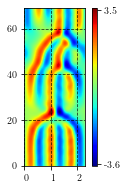


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 507250.1470768203
Target residual tolerance : 1.08e-06
Maximum iteration number : 17280
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["30", "36"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 507250.1470768203
Target residual tolerance : 1.08e-06
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["30", "36"]})
-------------------------------------------------------------------------------------------------
######################### Residual=1.0216105 after 25 lstsq iterations
######################

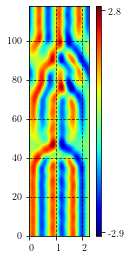


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 537513.0547883793
Target residual tolerance : 1.14e-06
Maximum iteration number : 18240
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["30", "38"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 537513.0547883793
Target residual tolerance : 1.14e-06
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["30", "38"]})
-------------------------------------------------------------------------------------------------
######################### Residual=0.8024053 after 25 lstsq iterations
######################

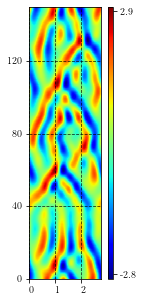


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 566445.1079605251
Target residual tolerance : 1.2000000000000002e-06
Maximum iteration number : 19200
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["30", "40"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 566445.1079605251
Target residual tolerance : 1.2000000000000002e-06
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["30", "40"]})
-------------------------------------------------------------------------------------------------
######################### Residual=2.1785108 after 25 lstsq itera

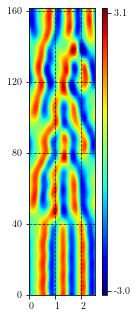


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 12273.853517623946
Target residual tolerance : 7.680000000000001e-07
Maximum iteration number : 12288
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["32", "24"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=14.5754586 after 5000 gradient descent steps. Parameters:(40.1196107946411, 18.851610482704064, 13.255003486096138)
#################################################
 Residual=10.3675395 after 10000 gradient descent steps. Parameters:(40.20758769993284, 18.971427599328877, 13.12185561267231)
######################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 9.3638286744

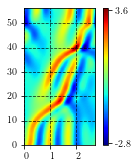


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 25356.183580859408
Target residual tolerance : 8.32e-07
Maximum iteration number : 13312
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["32", "26"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=21.1149053 after 5000 gradient descent steps. Parameters:(40.07208900752021, 18.845321186070226, 13.326900630486278)
#################################################
 Residual=15.7404054 after 10000 gradient descent steps. Parameters:(40.129340226402185, 18.921769716174506, 13.241427322412775)
#################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 13.71134210

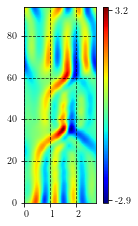


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 50007.47579684069
Target residual tolerance : 8.960000000000001e-07
Maximum iteration number : 14336
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["32", "28"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=23.2448903 after 5000 gradient descent steps. Parameters:(40.077400356225155, 19.689398047584024, 13.326629874244524)
#################################################
 Residual=16.9481263 after 10000 gradient descent steps. Parameters:(40.138278020615374, 19.70172618456341, 13.241116999277157)
###########################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial 

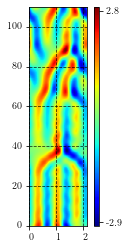


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 94840.8554397403
Target residual tolerance : 9.600000000000001e-07
Maximum iteration number : 15360
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["32", "30"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=33.2268164 after 5000 gradient descent steps. Parameters:(40.044824233285446, 19.4115578556562, 13.370604629813688)
#################################################
 Residual=24.6012798 after 10000 gradient descent steps. Parameters:(40.08293120734352, 19.446044134551894, 13.316586661472995)
#################################################
 Residual=20.6139868 after 15000 gradient descent steps. Parameters:(40.11699111410923, 19.461539926184884, 13.268022737305673)
###

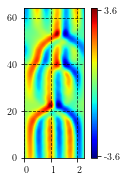


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 174028.75866694783
Target residual tolerance : 1.024e-06
Maximum iteration number : 16384
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["32", "32"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=46.6727655 after 5000 gradient descent steps. Parameters:(40.02515653891604, 19.15136555534821, 13.397804502701684)
#################################################
 Residual=35.0528812 after 10000 gradient descent steps. Parameters:(40.04782704279469, 19.214015677747536, 13.365172329282936)
#################################################
 Residual=29.4339104 after 15000 gradient descent steps. Parameters:(40.06879246027037, 19.242775693974362, 13.335043199130704)
#############

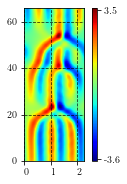


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 310551.925418045
Target residual tolerance : 1.088e-06
Maximum iteration number : 17408
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["32", "34"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=67.1122635 after 5000 gradient descent steps. Parameters:(40.01380114634284, 19.00744604360513, 13.41410960506957)
#################################################
 Residual=49.4757100 after 10000 gradient descent steps. Parameters:(40.026736093888715, 19.082061094669744, 13.395247585935772)
#################################################
 Residual=41.9096740 after 15000 gradient descent steps. Parameters:(40.03903630599913, 19.1240307216257, 13.37742996748295)
##################

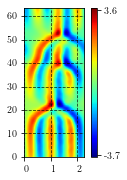


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 541294.4707256393
Target residual tolerance : 1.1520000000000002e-06
Maximum iteration number : 18432
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["32", "36"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 541294.4707256393
Target residual tolerance : 1.1520000000000002e-06
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["32", "36"]})
-------------------------------------------------------------------------------------------------
######################### Residual=21.1590418 after 25 lstsq iter

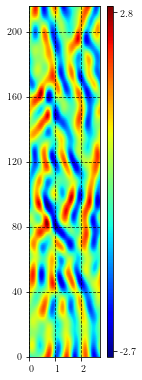


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 573586.7709743982
Target residual tolerance : 1.216e-06
Maximum iteration number : 19456
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["32", "38"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 573586.7709743982
Target residual tolerance : 1.216e-06
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["32", "38"]})
-------------------------------------------------------------------------------------------------
######################### Residual=0.0563893 after 25 lstsq iterations
####################

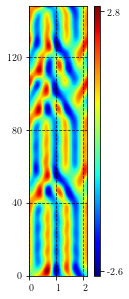


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 604459.3928625032
Target residual tolerance : 1.28e-06
Maximum iteration number : 20480
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["32", "40"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 604459.3928625032
Target residual tolerance : 1.28e-06
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["32", "40"]})
-------------------------------------------------------------------------------------------------
######################### Residual=40.4681080 after 25 lstsq iterations
#####################

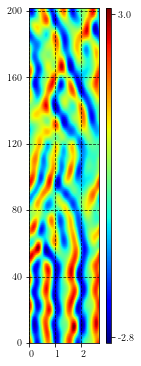


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 13045.97635564527
Target residual tolerance : 8.16e-07
Maximum iteration number : 13056
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["34", "24"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=15.5346769 after 5000 gradient descent steps. Parameters:(40.128767171397314, 18.89005613672231, 13.244572625886233)
#################################################
 Residual=10.9924414 after 10000 gradient descent steps. Parameters:(40.22225983490503, 19.009965731879426, 13.104019655140815)
##############################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 9.62226687961628

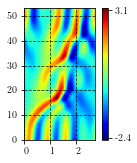


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 26950.969908087893
Target residual tolerance : 8.84e-07
Maximum iteration number : 14144
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["34", "26"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=22.6273545 after 5000 gradient descent steps. Parameters:(40.077954704006046, 18.88702921177486, 13.320597690407245)
#################################################
 Residual=16.7778820 after 10000 gradient descent steps. Parameters:(40.13923276736992, 18.962816242929218, 13.230271358964512)
#########################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 14.1

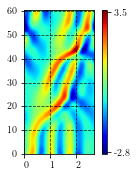


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 53152.37264980362
Target residual tolerance : 9.520000000000001e-07
Maximum iteration number : 15232
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["34", "28"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=24.9625867 after 5000 gradient descent steps. Parameters:(40.08369655733541, 19.728528176456454, 13.320287472315902)
#################################################
 Residual=18.0976611 after 10000 gradient descent steps. Parameters:(40.14888328771992, 19.73900166163353, 13.229861552510611)
#################################################
 Residual=14.7241108 after 15000 gradient descent steps. Parameters:(40.20479444267971, 19.75270316942822, 13.151067182799245)
##


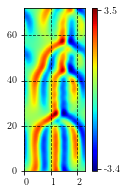


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 100805.0329465349
Target residual tolerance : 1.02e-06
Maximum iteration number : 16320
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["34", "30"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=35.7618541 after 5000 gradient descent steps. Parameters:(40.04859951911084, 19.46082801877214, 13.366877881338935)
#################################################
 Residual=26.4187711 after 10000 gradient descent steps. Parameters:(40.0896734735335, 19.494898843198026, 13.309758960539247)
#################################################
 Residual=22.0591851 after 15000 gradient descent steps. Parameters:(40.12620068162232, 19.509089634539936, 13.258442000557165)
#############
--

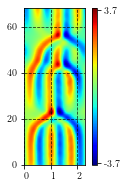


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 184972.4197069055
Target residual tolerance : 1.088e-06
Maximum iteration number : 17408
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["34", "32"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=50.1328957 after 5000 gradient descent steps. Parameters:(40.02731251248695, 19.206813749922798, 13.395676079857164)
#################################################
 Residual=37.7376889 after 10000 gradient descent steps. Parameters:(40.051854057598284, 19.270546905192752, 13.361174071758088)
#################################################
 Residual=31.6611536 after 15000 gradient descent steps. Parameters:(40.074481531504844, 19.29918250523496, 13.329329853090107)
############

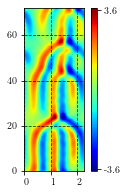


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 330080.35485677933
Target residual tolerance : 1.156e-06
Maximum iteration number : 18496
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["34", "34"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=71.9186490 after 5000 gradient descent steps. Parameters:(40.01499382277703, 19.06232662213813, 13.412921350343579)
#################################################
 Residual=53.1377342 after 10000 gradient descent steps. Parameters:(40.029026808925295, 19.139086607425348, 13.392976835002175)
#################################################
 Residual=45.0882020 after 15000 gradient descent steps. Parameters:(40.04235190079075, 19.181845980489165, 13.374139577563472)
############

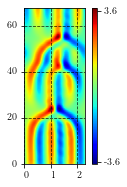


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 575332.1504509379
Target residual tolerance : 1.224e-06
Maximum iteration number : 19584
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["34", "36"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 575332.1504509379
Target residual tolerance : 1.224e-06
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["34", "36"]})
-------------------------------------------------------------------------------------------------
######################### Residual=6.6029901 after 25 lstsq iterations
####################

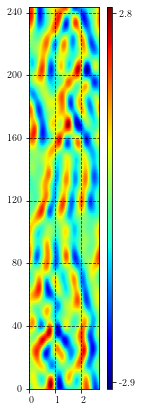


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 609653.9650049283
Target residual tolerance : 1.292e-06
Maximum iteration number : 20672
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["34", "38"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 609653.9650049283
Target residual tolerance : 1.292e-06
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["34", "38"]})
-------------------------------------------------------------------------------------------------
######################### Residual=14.2137332 after 25 lstsq iterations
###################

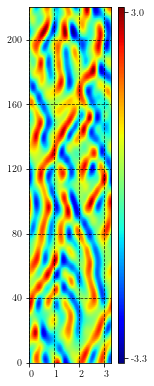


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 642467.070364706
Target residual tolerance : 1.3600000000000001e-06
Maximum iteration number : 21760
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["34", "40"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 642467.070364706
Target residual tolerance : 1.3600000000000001e-06
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["34", "40"]})
-------------------------------------------------------------------------------------------------
######################### Residual=171.6894695 after 25 lstsq itera

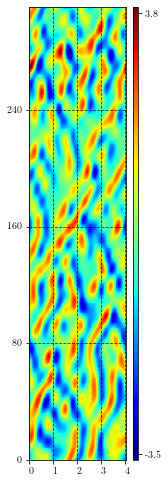


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 13818.219674594715
Target residual tolerance : 8.64e-07
Maximum iteration number : 13824
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["36", "24"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=16.4815236 after 5000 gradient descent steps. Parameters:(40.137926880219396, 18.927213276619977, 13.23420526105017)
#################################################
 Residual=11.6122054 after 10000 gradient descent steps. Parameters:(40.236831528033306, 19.046990064804056, 13.086339934731232)
######################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 9.8665

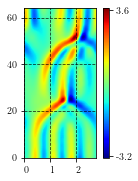


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 28545.941327242468
Target residual tolerance : 9.36e-07
Maximum iteration number : 14976
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["36", "26"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=24.1352839 after 5000 gradient descent steps. Parameters:(40.08389850359083, 18.92748831707455, 13.31431240787778)
#################################################
 Residual=17.8021399 after 10000 gradient descent steps. Parameters:(40.149128526992, 19.00247054407952, 13.219187577642582)
#################################################
-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 1

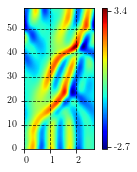


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 56297.47995761292
Target residual tolerance : 1.0080000000000001e-06
Maximum iteration number : 16128
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["36", "28"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=26.6778820 after 5000 gradient descent steps. Parameters:(40.090079347941995, 19.76732683653199, 13.313964582301276)
#################################################
 Residual=19.2335120 after 10000 gradient descent steps. Parameters:(40.1594981524357, 19.77583712506241, 13.218678933441876)
#################################################
 Residual=15.6070428 after 15000 gradient descent steps. Parameters:(40.21873502950937, 19.788273709169964, 13.13573011150814)
###

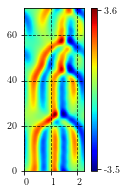


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 106769.32708203014
Target residual tolerance : 1.08e-06
Maximum iteration number : 17280
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["36", "30"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=38.3294043 after 5000 gradient descent steps. Parameters:(40.052473544539666, 19.509286918069506, 13.363156374232913)
#################################################
 Residual=28.2348178 after 10000 gradient descent steps. Parameters:(40.0965074010511, 19.542726828960376, 13.302957904780609)
#################################################
 Residual=23.4915859 after 15000 gradient descent steps. Parameters:(40.13546264587123, 19.555539826123223, 13.24891742461584)
##############

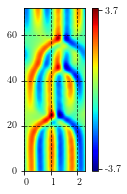


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 195916.10070557162
Target residual tolerance : 1.1520000000000002e-06
Maximum iteration number : 18432
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["36", "32"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=53.6698958 after 5000 gradient descent steps. Parameters:(40.02954425447643, 19.261176721493705, 13.39354843921044)
#################################################
 Residual=40.4578784 after 10000 gradient descent steps. Parameters:(40.055986143996805, 19.325675694454308, 13.357183115913697)
#################################################
 Residual=33.9018675 after 15000 gradient descent steps. Parameters:(40.08027880228185, 19.354045781044643, 13.32363471074719)


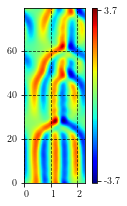


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 349608.57531982765
Target residual tolerance : 1.224e-06
Maximum iteration number : 19584
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["36", "34"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=76.8532447 after 5000 gradient descent steps. Parameters:(40.01623492224976, 19.116380581727082, 13.41173323292154)
#################################################
 Residual=56.8804811 after 10000 gradient descent steps. Parameters:(40.03139802346551, 19.19500207175566, 13.390707515734634)
#################################################
 Residual=48.3212693 after 15000 gradient descent steps. Parameters:(40.04576797341592, 19.238344966003005, 13.370853684004949)
##############

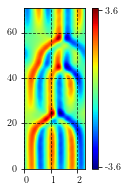


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 609369.2530734668
Target residual tolerance : 1.2960000000000002e-06
Maximum iteration number : 20736
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["36", "36"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 609369.2530734668
Target residual tolerance : 1.2960000000000002e-06
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["36", "36"]})
-------------------------------------------------------------------------------------------------
######################### Residual=25.6133757 after 25 lstsq iter

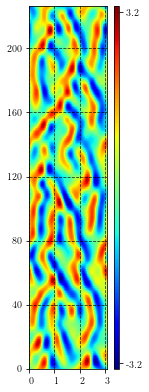


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 645720.971550299
Target residual tolerance : 1.368e-06
Maximum iteration number : 21888
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["36", "38"]})
-------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 645720.971550299
Target residual tolerance : 1.368e-06
Maximum iteration number : 250
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["40.0", "18.0", "13.4346"], "field_shape": ["36", "38"]})
-------------------------------------------------------------------------------------------------
######################### Residual=28.9810183 after 25 lstsq iterations
#####################

In [ ]:
conv_test_res = []
conv_test_orb = []
for (N,M) in itertools.product(range(16, 38, 2), range(24, 42, 2)):
    clipping = clip(int2,  ((380, 420), (19, 21)), clipping_class=RelativeOrbitKS).reshape(N, M)
    clipping_result = converge(clipping, method='hybrid', verbose=True, preconditioning=False)
    clipping_result.orbit.plot()
    conv_test_orb.append(clipping_result.orbit)
    conv_test_res.append(clipping_result.residuals[-1][-1])

In [ ]:
clipping = clip(int2,  ((380, 420), (19, 21)), clipping_class=RelativeOrbitKS).reshape(32, 32)
clipping_long_comp_result = converge(clipping, method='hybrid', verbose=True, preconditioning=True, comp_time='excessive')
clipping_long_comp_result.orbit.plot()

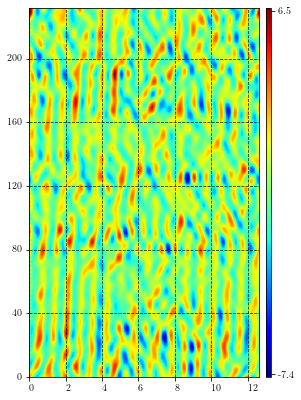

In [23]:
clipping_result.orbit.plot()

By looking at the collection of orbits as well as time integrated trajectories the important patterns were identified
these are denoted as **fundamental periodic orbits**.
They were small in number ~5-7, but after further investigation via numerical continuation, it was shown that some of these
fundamental orbits were in fact the same.

This was a realization that fundamental periodic orbits exist in continuous families. This isn't a breakthrough by any stretch but in hindsight it makes a good amount of sense. Namely, solutions were already known to exist in continuous families.

Therefore, if all orbits are comprised of fundamental periodic orbits, they have to exist on "rubberized tiles"


In [18]:
td[1].residual()

NameError: name 'td' is not defined

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks(comoving=True)

In [ ]:
td[0].plot(figsize=(2,2))
td[1].plot(figsize=(2,2), padding=False)
td[2].plot(figsize=(2,2))